# StreetEasy Dataset
![streeteasy.png](QKoHPKM.png)

StreetEasy is New York City’s leading real estate marketplace — from studios to high-rises, Brooklyn Heights to Harlem.

We have partnered with the StreetEasy Research team for the Multiple Linear Regression (MLR) lesson, and you will be working with a .csv file that contains a sample of 5,000 rentals listings in Manhattan, Brooklyn, and Queens. You’ll find the correlations between several features and the rent, build/evaluate a MLR model, and use the model to present interesting findings:

- “Does having a washer/dryer in unit increase the price of rent?”
- “How costly is living by a subway station in Brooklyn/Queens?”
- And most importantly, “Is a tenant over or underpaying?”
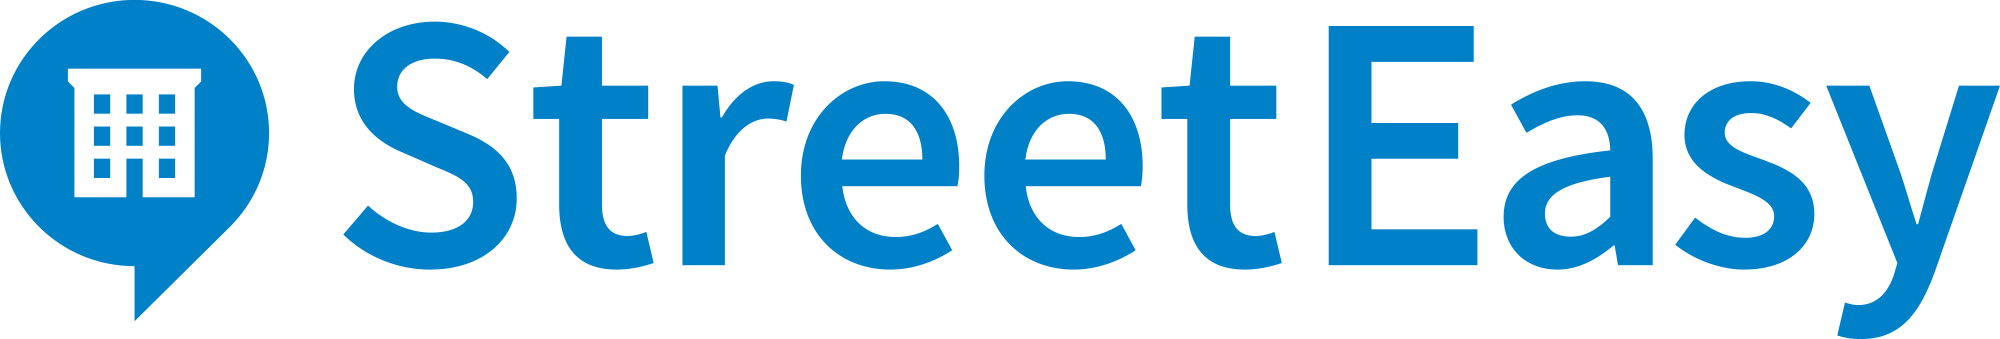

Samples Total	5000
Dimensionality	20
Features	text & real, positive
<br>

It has the following fields:

- rental_id - rental ID
- building_id - building ID
- rent - price of rent ($)
- bedrooms - number of bedrooms
- bathrooms - number of bathrooms
- size_sqft - size (ft²)
- min_to_subway - subway station (min)
- floor - floor number
- building_age_yrs - building age (year)
- no_fee - has no broker fee (0/1)
- has_roofdeck - has roof deck (0/1)
- has_washer_dryer - has in-unit washer/dryer (0/1)
- has_doorman - has doorman (0/1)
- has_elevator - has elevator (0/1)
- has_dishwasher - has dishwasher (0/1)
- has_patio - has patio (0/1)
- has_gym - has gym (0/1)
- neighborhood - neighborhood (ex: Greenpoint)
- submarket - submarket (ex: North Brooklyn)
- borough - borough (ex: Brooklyn)

To understand the data better, take a look at the apartments on StreetEasy: __[www.streeteasy.com/rentals](www.streeteasy.com/rentals)__.

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
# load data file
streeteasy = pd.read_csv('streeteasy.csv')

In [3]:
# df inspection
streeteasy.head()

,rental_id,building_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,submarket,borough
0,1545,44518357,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,All Upper East Side,Manhattan
1,2472,94441623,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,All Downtown,Manhattan
2,10234,87632265,3000,3.0,1,1000,4,1.0,106,0,0,0,0,0,0,0,0,Astoria,Northwest Queens,Queens
3,2919,76909719,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,All Midtown,Manhattan
4,2790,92953520,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,All Downtown,Manhattan


In [4]:
# data types
print(streeteasy.info())
# summary statistics
streeteasy.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rental_id         5000 non-null   int64  
 1   building_id       5000 non-null   int64  
 2   rent              5000 non-null   int64  
 3   bedrooms          5000 non-null   float64
 4   bathrooms         5000 non-null   int64  
 5   size_sqft         5000 non-null   int64  
 6   min_to_subway     5000 non-null   int64  
 7   floor             5000 non-null   float64
 8   building_age_yrs  5000 non-null   int64  
 9   no_fee            5000 non-null   int64  
 10  has_roofdeck      5000 non-null   int64  
 11  has_washer_dryer  5000 non-null   int64  
 12  has_doorman       5000 non-null   int64  
 13  has_elevator      5000 non-null   int64  
 14  has_dishwasher    5000 non-null   int64  
 15  has_patio         5000 non-null   int64  
 16  has_gym           5000 non-null   int64  


,rental_id,building_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,submarket,borough
count,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000,5000,5000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93,15,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Upper West Side,All Downtown,Manhattan
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,579,1229,3539
mean,5526.909400,5.122007e+07,4536.920800,1.395700,1.321600,920.101400,5.079200,10.190200,52.093200,0.429600,0.12860,0.133800,0.228000,0.240000,0.155600,0.045600,0.143800,NaN,NaN,NaN
std,3263.692417,2.802283e+07,2929.838953,0.961018,0.565542,440.150464,5.268897,10.565361,40.224501,0.495069,0.33479,0.340471,0.419585,0.427126,0.362512,0.208637,0.350922,NaN,NaN,NaN
min,1.000000,7.107000e+03,1250.000000,0.000000,0.000000,250.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,2699.750000,2.699811e+07,2750.000000,1.000000,1.000000,633.000000,2.000000,3.000000,12.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,5456.500000,5.069894e+07,3600.000000,1.000000,1.000000,800.000000,4.000000,6.000000,44.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
75%,8306.000000,7.572064e+07,5200.000000,2.000000,2.000000,1094.000000,6.000000,14.000000,89.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN


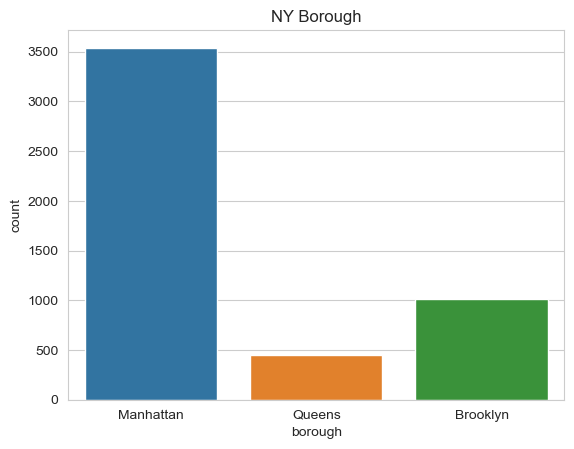

count          5000
unique            3
top       Manhattan
freq           3539
Name: borough, dtype: object


<Figure size 640x480 with 0 Axes>

In [5]:
# borough distribution
sns.countplot(streeteasy, x='borough')
plt.title('NY Borough')
plt.show()
plt.clf()
print(streeteasy.borough.describe())

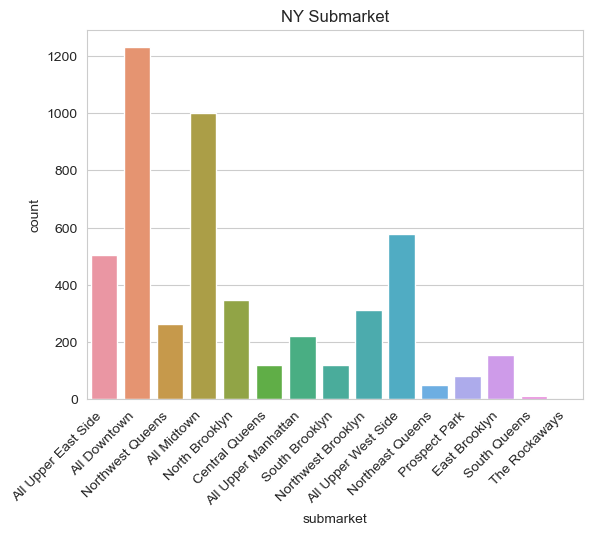

submarket
All Downtown           1229
All Midtown            1001
All Upper West Side     579
All Upper East Side     505
North Brooklyn          347
Northwest Brooklyn      311
Northwest Queens        265
All Upper Manhattan     221
East Brooklyn           155
Central Queens          121
South Brooklyn          119
Prospect Park            81
Northeast Queens         52
South Queens             13
The Rockaways             1
Name: count, dtype: int64


<Figure size 640x480 with 0 Axes>

In [6]:
# submarket distribution
sns.countplot(streeteasy, x='submarket')
plt.xticks(rotation=45, ha='right')
plt.title('NY Submarket')
plt.show()
plt.clf()
print(streeteasy.submarket.value_counts())

/Users/matth/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


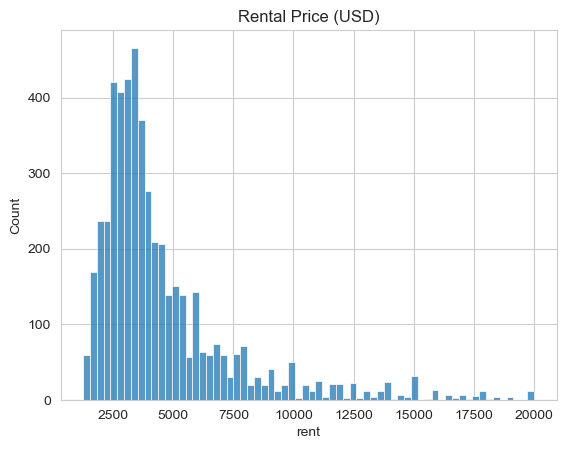

count     5000.000000
mean      4536.920800
std       2929.838953
min       1250.000000
25%       2750.000000
50%       3600.000000
75%       5200.000000
max      20000.000000
Name: rent, dtype: float64


<Figure size 640x480 with 0 Axes>

In [7]:
# price rent distribution
sns.histplot(streeteasy, x='rent')
plt.title('Rental Price (USD)')
plt.show()
plt.clf()
print(streeteasy.rent.describe())

count    5000.000000
mean       52.093200
std        40.224501
min         0.000000
25%        12.000000
50%        44.000000
75%        89.000000
max       180.000000
Name: building_age_yrs, dtype: float64


/Users/matth/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


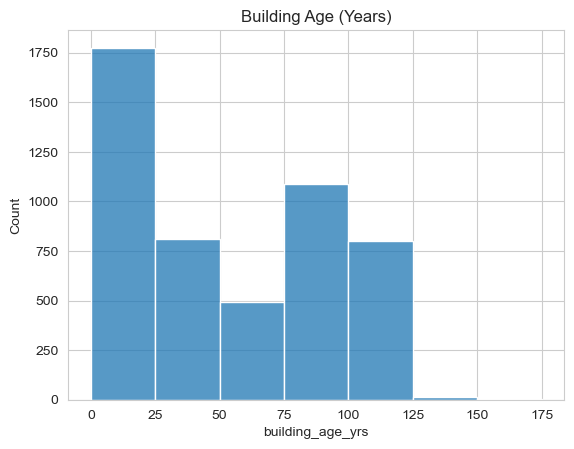

<Figure size 640x480 with 0 Axes>

In [8]:
# building age distribution
print(streeteasy.building_age_yrs.describe())
sns.histplot(streeteasy, x='building_age_yrs', bins=range(0,200, 25))
plt.title('Building Age (Years)')
plt.show()
plt.clf()

/Users/matth/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


count    5000.000000
mean      920.101400
std       440.150464
min       250.000000
25%       633.000000
50%       800.000000
75%      1094.000000
max      4800.000000
Name: size_sqft, dtype: float64


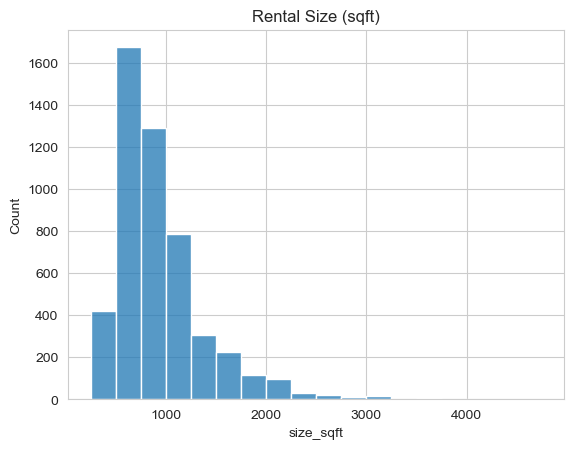

<Figure size 640x480 with 0 Axes>

In [9]:
# rental size (sqft) distribution
print(streeteasy.size_sqft.describe())
sns.histplot(streeteasy, x='size_sqft', bins=range(250, 4800, 250))
plt.title('Rental Size (sqft)')
plt.show()
plt.clf()

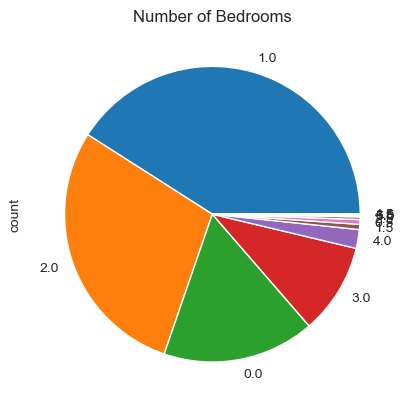

bedrooms
1.0    0.4096
2.0    0.2876
0.0    0.1664
3.0    0.0992
4.0    0.0206
1.5    0.0056
0.5    0.0052
2.5    0.0030
5.0    0.0016
3.5    0.0010
4.5    0.0002
Name: proportion, dtype: float64


<Figure size 640x480 with 0 Axes>

In [10]:
# bedroom numbers distribution
streeteasy.bedrooms.value_counts().plot.pie()
plt.title('Number of Bedrooms')
plt.show()
plt.clf()
print(streeteasy.bedrooms.value_counts(normalize=True))

has_dishwasher
0    4222
1     778
Name: count, dtype: int64


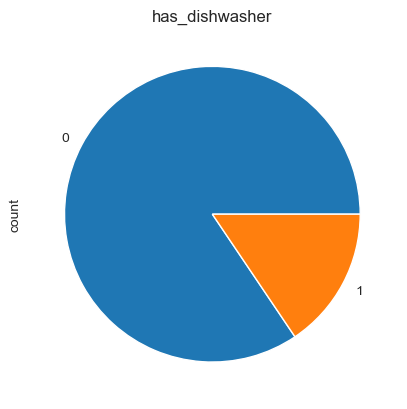

<Figure size 640x480 with 0 Axes>

In [11]:
# has_dishwasher proportion
print(streeteasy.has_dishwasher.value_counts())
streeteasy.has_dishwasher.value_counts().plot.pie()
plt.title('has_dishwasher')
plt.show()
plt.clf()

has_washer_dryer
0    4331
1     669
Name: count, dtype: int64


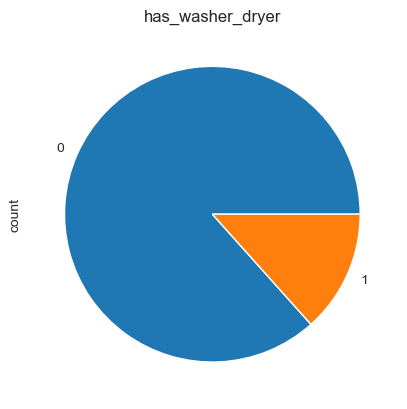

<Figure size 640x480 with 0 Axes>

In [12]:
# has_washer_dryer proportion
print(streeteasy.has_washer_dryer.value_counts())
streeteasy.has_washer_dryer.value_counts().plot.pie()
plt.title('has_washer_dryer')
plt.show()
plt.clf()

In [13]:
# Rental price with washer & dryer or vice-versa (mean)
print('Avg rental price having washer & dryer:', streeteasy[streeteasy.has_washer_dryer == 1].rent.mean().round(2))
print('Avg rental price with no washer & dryer:', streeteasy[streeteasy.has_washer_dryer == 0].rent.mean().round(2))

Avg rental price having washer & dryer: 5253.5
Avg rental price with no washer & dryer: 4426.23


In [14]:
# Rental price with washer & dryer or vice-versa (median)
print('Median rental price having washer & dryer:', streeteasy[streeteasy.has_washer_dryer == 1].rent.median())
print('Median rental price with no washer & dryer:', streeteasy[streeteasy.has_washer_dryer == 0].rent.median())

Median rental price having washer & dryer: 4100.0
Median rental price with no washer & dryer: 3500.0


In [15]:
# median price by number of bedrooms
print('Median price by number of bedrooms:')
streeteasy.groupby('bedrooms').rent.median()

Median price by number of bedrooms:


bedrooms
0.0     2725.0
0.5     2610.0
1.0     3500.0
1.5     2975.0
2.0     4850.0
2.5     4100.0
3.0     6582.5
3.5     6150.0
4.0     6900.0
4.5     4500.0
5.0    11378.5
Name: rent, dtype: float64

In [16]:
# median price by number of bedrooms and has_elevator
print('Median price by number of bedrooms and having or not elevator:')
streeteasy.groupby(['bedrooms', 'has_elevator']).rent.median()

Median price by number of bedrooms and having or not elevator:


bedrooms  has_elevator
0.0       0                2700.0
          1                2762.5
0.5       0                2600.0
          1                2650.0
1.0       0                3400.0
          1                3700.0
1.5       0                2550.0
          1                4400.0
2.0       0                4500.0
          1                6000.0
2.5       0                3350.0
          1                9500.0
3.0       0                5700.0
          1                8785.0
3.5       0                5249.5
          1               12000.0
4.0       0                6000.0
          1                9450.0
4.5       0                4500.0
5.0       0                9226.0
          1               14250.0
Name: rent, dtype: float64

Average price by borough:
borough
Brooklyn     3327.403751
Manhattan    5138.940379
Queens       2516.147321
Name: rent, dtype: float64


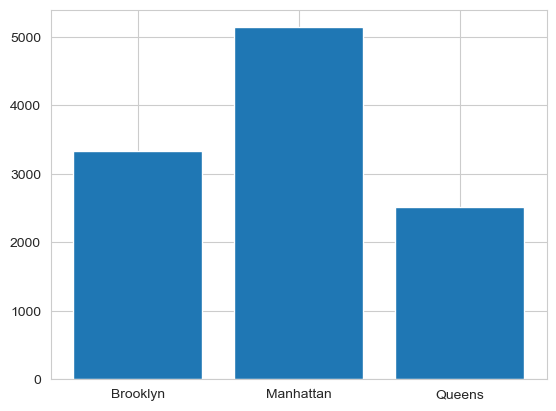

<Figure size 640x480 with 0 Axes>

In [17]:
# Rental price by borough (mean)
print('Average price by borough:')
mean_borough = streeteasy.groupby(['borough']).rent.mean()
print(mean_borough)
plt.bar(mean_borough.index, height=mean_borough)
plt.show(); plt.clf()

In [18]:
# Rental price by borough (median)
print('Median price by borough:')
streeteasy.groupby(['borough']).rent.median()

Median price by borough:


borough
Brooklyn     3000.0
Manhattan    4000.0
Queens       2350.0
Name: rent, dtype: float64

In [19]:
# Rental price by bedrooms and borough
print('Median price by number of bedrooms and borough:')
streeteasy.groupby(['bedrooms', 'borough']).rent.median()

Median price by number of bedrooms and borough:


bedrooms  borough  
0.0       Brooklyn      2575.0
          Manhattan     2830.0
          Queens        1625.0
0.5       Brooklyn      2150.0
          Manhattan     2610.0
1.0       Brooklyn      2800.0
          Manhattan     3800.0
          Queens        2200.0
1.5       Brooklyn      2500.0
          Manhattan     4197.5
          Queens        1700.0
2.0       Brooklyn      3492.0
          Manhattan     6000.0
          Queens        2550.0
2.5       Brooklyn      3349.0
          Manhattan     8392.5
3.0       Brooklyn      3772.5
          Manhattan     8500.0
          Queens        2950.0
3.5       Brooklyn      4172.0
          Manhattan    11225.0
4.0       Brooklyn      4047.5
          Manhattan     9700.0
          Queens        3400.0
4.5       Brooklyn      4500.0
5.0       Brooklyn      4500.0
          Manhattan    11500.0
Name: rent, dtype: float64

In [20]:
# Rental price by borough has_dishwasher
print('Rental price by borough has_dishwasher:')
streeteasy.groupby(['borough', 'has_dishwasher']).rent.median()

Rental price by borough has_dishwasher:


borough    has_dishwasher
Brooklyn   0                 2995.0
           1                 3320.0
Manhattan  0                 3950.0
           1                 4400.0
Queens     0                 2350.0
           1                 2425.0
Name: rent, dtype: float64

In [21]:
# Rental price by borough has_washer_dryer
print('Rental price by borough has_washer_dryer:')
streeteasy.groupby(['borough', 'has_washer_dryer']).rent.median()

Rental price by borough has_washer_dryer:


borough    has_washer_dryer
Brooklyn   0                   2995.0
           1                   3500.0
Manhattan  0                   3950.0
           1                   4300.0
Queens     0                   2350.0
           1                   2400.0
Name: rent, dtype: float64

In [22]:
# Rental price by borough and submarket
print('Rental price by borough and submarket:')
streeteasy.groupby(['borough', 'submarket']).rent.median()

Rental price by borough and submarket:


borough    submarket          
Brooklyn   East Brooklyn          2500.0
           North Brooklyn         3325.0
           Northwest Brooklyn     3299.0
           Prospect Park          2729.0
           South Brooklyn         1984.0
Manhattan  All Downtown           4500.0
           All Midtown            3800.0
           All Upper East Side    4041.0
           All Upper Manhattan    2450.0
           All Upper West Side    4000.0
           Northwest Queens       2881.5
Queens     Central Queens         1999.0
           Northeast Queens       1950.0
           Northwest Queens       2695.0
           South Queens           1575.0
           The Rockaways          1650.0
Name: rent, dtype: float64

In [23]:
# extracting rent price per sqft to new column price_sqft
streeteasy['price_sqft'] = streeteasy.rent / streeteasy.size_sqft
streeteasy.head()

,rental_id,building_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,...,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,submarket,borough,price_sqft
0,1545,44518357,2550,0.0,1,480,9,2.0,17,1,...,0,0,1,1,0,1,Upper East Side,All Upper East Side,Manhattan,5.312500
1,2472,94441623,11500,2.0,2,2000,4,1.0,96,0,...,0,0,0,0,0,0,Greenwich Village,All Downtown,Manhattan,5.750000
2,10234,87632265,3000,3.0,1,1000,4,1.0,106,0,...,0,0,0,0,0,0,Astoria,Northwest Queens,Queens,3.000000
3,2919,76909719,4500,1.0,1,916,2,51.0,29,0,...,0,1,1,1,0,0,Midtown,All Midtown,Manhattan,4.912664
4,2790,92953520,4795,1.0,1,975,3,8.0,31,0,...,0,1,1,1,0,1,Greenwich Village,All Downtown,Manhattan,4.917949


In [24]:
# Price per sqft by borough
streeteasy.groupby(['borough']).price_sqft.median()

borough
Brooklyn     3.777778
Manhattan    5.352113
Queens       3.010062
Name: price_sqft, dtype: float64

In [25]:
# Price per sqft by borough and submarket
streeteasy.groupby(['borough', 'submarket']).price_sqft.median()

borough    submarket          
Brooklyn   East Brooklyn          2.782609
           North Brooklyn         4.266667
           Northwest Brooklyn     4.387001
           Prospect Park          3.500000
           South Brooklyn         2.366667
Manhattan  All Downtown           5.867710
           All Midtown            5.357143
           All Upper East Side    5.081967
           All Upper Manhattan    3.214286
           All Upper West Side    5.223214
           Northwest Queens       4.262857
Queens     Central Queens         2.526316
           Northeast Queens       2.471888
           Northwest Queens       3.666667
           South Queens           2.521739
           The Rockaways          1.885714
Name: price_sqft, dtype: float64

In [26]:
# Price per sqft by borough, submarket and buildin_age_yrs
streeteasy.groupby(['borough', 'building_age_yrs']).price_sqft.median()

borough   building_age_yrs
Brooklyn  0                   4.221863
          1                   6.400419
          2                   4.618321
          3                   4.715096
          4                   4.621320
                                ...   
Queens    101                 2.800000
          106                 3.458333
          115                 2.631818
          116                 3.160714
          126                 2.454545
Name: price_sqft, Length: 276, dtype: float64